# Тестовое задание для Analytics summer camp

#### 2.	Перед тобой датасет некой интернет-компании. 

##### import modules

In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv(glob('*.csv')[0], parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52724 entries, 0 to 52723
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                52724 non-null  datetime64[ns]
 1   source              52724 non-null  object        
 2   medium              52724 non-null  object        
 3   delivery_available  52724 non-null  object        
 4   device_type         52724 non-null  object        
 5   promo_activated     52724 non-null  object        
 6   filter_used         52724 non-null  object        
 7   pageviews           52724 non-null  int64         
 8   visits              52724 non-null  int64         
 9   productClick        52724 non-null  int64         
 10  addToCart           52724 non-null  int64         
 11  checkout            52724 non-null  int64         
 12  transactions        52724 non-null  int64         
 13  revenue             52724 non-null  float64   

#### a.	Какой рекламный канал принёс больше всего дохода за всё время?

In [3]:
source_revenue = df.loc[df['medium'].isin(['cpc','cpa'])]

In [4]:
source_revenue = source_revenue.groupby(by = ['source'])['revenue'].sum().reset_index()
source_revenue.sort_values('revenue', ascending = False)

,source,revenue
12,yandex,263161700.0
6,google,165179729.0
1,admitad,65738858.0
4,eLama,16432390.0
3,cityads,14290767.0
10,other,789066.0
0,actionpay,555717.0
2,advertise,440436.0
9,opmcpa,393825.0
11,vk,13083.0


## Ответ: yandex

#### b.	Как изменился средний чек транзакции после введения коронавирусных ограничений? Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)

In [224]:
# сделаем копию dataframe
avg_purch_all = df[:]
# высчитаем среднее значение за 1 транзацкию
avg_purch_all['avg_revenue'] = avg_purch_all['revenue'] / avg_purch_all['transactions']
# 
avg_purch_all_before = avg_purch_all[avg_purch_all['date'] < '05.03.2020'][:]
avg_purch_all_after = avg_purch_all[avg_purch_all['date'] > '05.03.2020'][:]

avg_purch_all_after_2m = avg_purch_all.loc[(avg_purch_all['date'] > '05.03.2020')&(avg_purch_all['date'] < '05.05.2020')][:]



C:\Users\Тимофей\AppData\Local\Temp\ipykernel_24044\3350989793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_purch_all['avg_revenue'] = avg_purch_all['revenue'] / avg_purch_all['transactions']


##### Как изменился средний чек транзакции после введения коронавирусных ограничений?

##### Для начала посмотроим на то как менялся средний чек транзакции на протяжении всего периода и убедимся, что он изменился

In [208]:
# создадим копию DataFrame
avg_purch_all_for_plot = avg_purch_all[:]

# оставим только месяцы, чтобы было легче группировать 
avg_purch_all_for_plot['date'] = avg_purch_all_for_plot['date'].dt.month

#сгруппируем данные по месяцам
avg_purch_all_for_plot = avg_purch_all_for_plot.groupby(by = 'date').agg({
    'avg_revenue':'mean',
    'transactions':'mean'}).reset_index()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


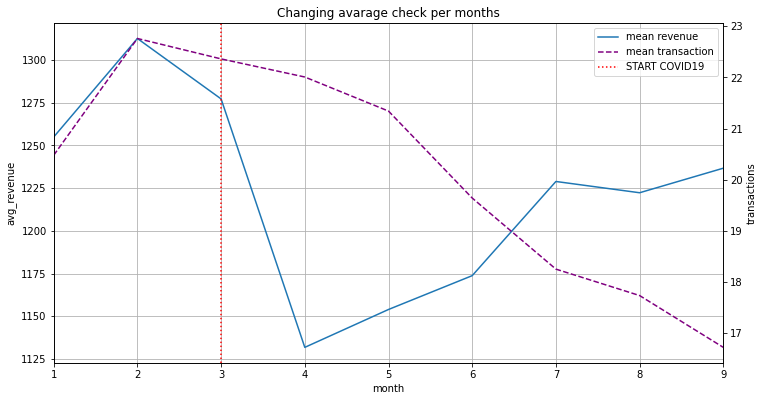

In [211]:
# построим график
plt.figure(figsize=(12,6.25))
plt.grid()
line1 = sns.lineplot(
    data = avg_purch_all_for_plot, 
    x = avg_purch_all_for_plot['date'], 
    y =  avg_purch_all_for_plot['avg_revenue']
    )
line1.legend().set_visible(False)
line1.set_xlabel('month')

ax2 = plt.twinx()
line2 = sns.lineplot(
    data = avg_purch_all_for_plot, 
    x = avg_purch_all_for_plot['date'], 
    y =  avg_purch_all_for_plot['transactions'],
    ax=ax2, color = 'purple', linestyle = '--')

    
line3 = plt.axvline(3, color = 'red', label = 'Start COVID19', linestyle = 'dotted')
plt.title('Changing avarage check per months')
plt.legend([line1.get_lines()[0], line2.get_lines()[0],line3],['mean revenue','mean transaction','START COVID19'])
plt.xlabel('month')
plt.xlim(1,9)
plt.show()

##### На графике видно, что после введения ковид-ограничений средний чек транзакции упал
##### Гипотреза: мае-июле уменьшили количество каналов превличения трафика и общий рекламный бюджет. На это указывает уменьшение среднего количества транзакций и увеличение среднего чека 


##### Посчитаем как изменился средний чек до короновирусных ограничений и после
Что будем сравнимать:

1. Период до и все месяцы после
2. Период до и 2 месяца после


In [219]:
# сравниваем период до и все месяцы после
# высчитываем среднее значение до короновирусных ограничей
avg_cost_before = (avg_purch_all_before['revenue'].sum() / avg_purch_all_before['transactions'].sum())

# высчитываем среднее значение до короновирусных ограничей
avg_cost_after = (avg_purch_all_after['revenue'].sum() / avg_purch_all_after['transactions'].sum())
perc_diff = avg_cost_after / avg_cost_before
print(round(1- perc_diff,3))
print(avg_cost_before, avg_cost_after )

0.016
1214.7597944688168 1195.6830108948566


In [229]:
avg_purch_all_after_2m

1 - (avg_purch_all_after_2m['revenue'].sum() / avg_purch_all_after_2m['transactions'].sum()) / avg_cost_before 

0.08190445454475392

In [21]:
avg_purch_all_after['avg_revenue'].mean() / avg_purch_all_before['avg_revenue'].mean() - 1

-0.03091210418871715

In [96]:
avg_purch_all = df[['date','source', 'device_type','promo_activated', 'transactions', 'revenue']][:]

In [97]:
avg_purch_all['date'] = avg_purch_all['date'].dt.month

In [110]:
avg_purch_all = avg_purch_all.groupby(by = 'date')['revenue'].mean().reset_index()

In [40]:
avg_purch_all_before['date'] = avg_purch_all_before['date'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [45]:
avg_purch_all_before_upb = avg_purch_all_before.groupby(by = 'date')['avg_revenue'].mean().reset_index()[]


<AxesSubplot:xlabel='date', ylabel='avg_revenue'>

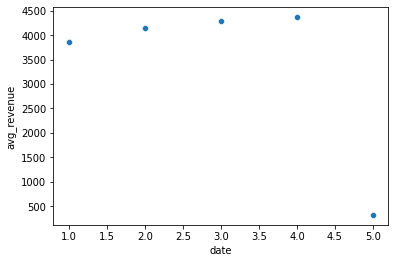

In [46]:
sns.scatterplot(data=avg_purch_all_before_upb, x=avg_purch_all_before_upb['date'],y = avg_purch_all_before_upb['avg_revenue'])

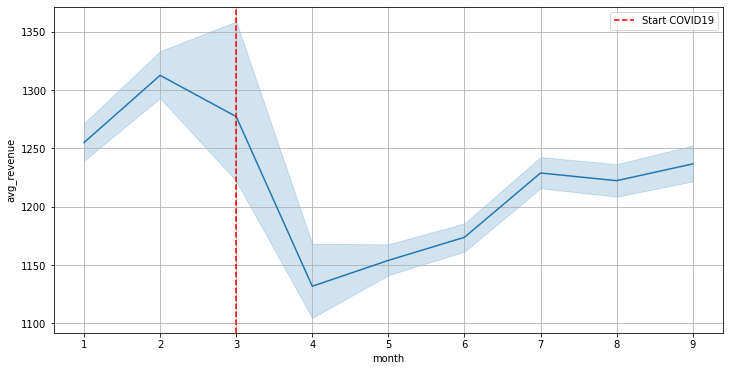

In [32]:
plt.figure(figsize=(12,6))
plt.grid()
sns.lineplot(data = avg_purch_all1, x = avg_purch_all1['date'], y =  avg_purch_all1['avg_revenue'] )
plt.axvline(3, color = 'red', label = 'Start COVID19', linestyle = '--')
plt.legend()
plt.xlabel('month')
# plt.plot(avg_purch_all1['date'], avg_purch_all1['revenue'])
plt.show()